In [1]:
import numpy as np # linear algebra
import pandas as pd # data manipulation and analysis
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
sns.set_style('whitegrid') # set style for visualization
import re

# Loading the Dataset

In [2]:
df = pd.read_csv('./data/survey.csv')
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


# Initial Exploration and Understanding

In [3]:
# Shape and Data Types
print("Number of Rows, Columns:", df.shape)
df.info()

Number of Rows, Columns: (1259, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               

In [4]:
# Inital Look at Distribution
# Separate Numeric and Categorical Columns
df_numeric = df.select_dtypes(include=['float64','int64'])
df_categorical = df.drop(columns=df_numeric.columns)

# Distribution of Numeric Columns
df_numeric.describe()

,Age
count,1.259000e+03
mean,7.942815e+07
std,2.818299e+09
min,-1.726000e+03
25%,2.700000e+01
50%,3.100000e+01
75%,3.600000e+01
max,1.000000e+11


In [5]:
# Overview of Categorical Data:
for col in df:
    print(f"\nValue counts for {col}:")
    print(df[col].value_counts(dropna=False))


Value counts for Timestamp:
Timestamp
2014-08-27 12:43:28    2
2014-08-27 15:55:07    2
2014-08-27 12:54:11    2
2014-08-27 12:44:51    2
2014-08-27 12:37:50    2
                      ..
2015-04-02 15:47:43    1
2015-04-04 11:22:05    1
2015-04-06 14:58:29    1
2015-04-11 14:35:22    1
2016-02-01 23:04:31    1
Name: count, Length: 1246, dtype: int64

Value counts for Age:
Age
 29             85
 32             82
 26             75
 27             71
 33             70
 28             68
 31             67
 34             65
 30             63
 25             61
 35             55
 23             51
 24             46
 37             43
 38             39
 36             37
 39             33
 40             33
 43             28
 41             21
 22             21
 42             20
 21             16
 45             12
 46             12
 44             11
 19              9
 18              7
 50              6
 48              6
 20              6
 51              5
 56        

# Data Cleaning

## Missing Values

In [6]:
# Dropping Unecessary Columns
df = df.drop(columns=['Timestamp', 'state', 'comments', 'anonymity'], axis=1)
df.columns

Index(['Age', 'Gender', 'Country', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [7]:
# Filling Missing Values For Categorical Fields
# Self-Employed Column
df['self_employed'] = df['self_employed'].fillna(df['self_employed'].mode()[0])

# Work Interfere Column
df['work_interfere'] = df['work_interfere'].fillna('Never')

# Check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1259 non-null   int64 
 1   Gender                     1259 non-null   object
 2   Country                    1259 non-null   object
 3   self_employed              1259 non-null   object
 4   family_history             1259 non-null   object
 5   treatment                  1259 non-null   object
 6   work_interfere             1259 non-null   object
 7   no_employees               1259 non-null   object
 8   remote_work                1259 non-null   object
 9   tech_company               1259 non-null   object
 10  benefits                   1259 non-null   object
 11  care_options               1259 non-null   object
 12  wellness_program           1259 non-null   object
 13  seek_help                  1259 non-null   object
 14  leave   

## Correcting Inconsistencies

Rows Before: 1259
Rows After: 1219


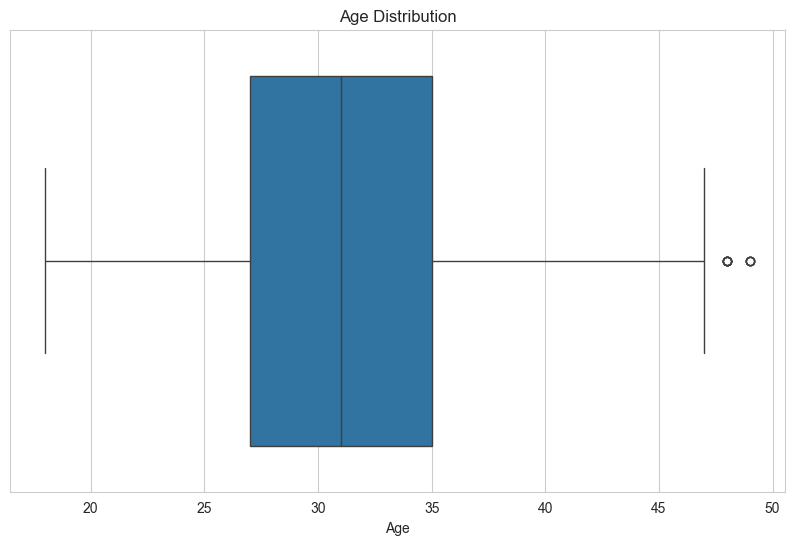

,Age
count,1219.000000
mean,31.468417
std,6.276310
min,18.000000
25%,27.000000
50%,31.000000
75%,35.000000
max,49.000000


In [8]:
# Age Field: Drop rows where the Age is outside of the working age range (18 - 65)
print("Rows Before:", df.shape[0])
df = df[(df['Age'] >= 18) & (df['Age'] <= 65)]

# Handle Outliers Using IQR Method
def bounds(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    return (lower, upper)

lower_bound, upper_bound = bounds(df['Age'])
df = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]

print("Rows After:", df.shape[0])

# Age Distribution
plt.figure(figsize=(10,6))
sns.boxplot(x=df.Age, orient='h')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

df.describe()


In [9]:
# Gender Column: Change Values to Either Male or Female
# Dictionary to map all values to either Male/Female
gender_map = {
    # Male variants
    'male': 'Male',
    'm': 'Male',
    'make': 'Male',
    'man': 'Male',
    'male-ish': 'Male',
    'male (cis)': 'Male',
    'mal': 'Male',
    'something kinda male?': 'Male',
    'maile': 'Male',
    'male leaning androgynous': 'Male',
    'guy (-ish) ^_^': 'Male',
    'msle': 'Male',
    'mail': 'Male',
    'cis male': 'Male',
    'malr': 'Male',
    'cis man': 'Male',
    'ostensibly male, unsure what that really means': 'Male',

    # Female variants
    'female': 'Female',
    'f': 'Female',
    'woman': 'Female',
    'female (trans)': 'Female',
    'trans-female': 'Female',
    'cis female': 'Female',
    'femake': 'Female',
    'cis-female/femme': 'Female',
    'trans woman': 'Female',
    'female (cis)': 'Female',
    'femail': 'Female'
}

df['Gender'] = (
    df['Gender']
    .str.strip()        # Change each value in the series to a string
    .str.lower()        # Lowercase for convention
    .map(gender_map)    # Map each value according to the dict
    .fillna('Other')    # Any value that doesn't easily fit into male or female will be Other
)

# Check
print("Total Rows:", df['Gender'].value_counts(dropna=False).sum())
print(df['Gender'].value_counts(dropna=False))

Total Rows: 1219
Gender
Male      960
Female    249
Other      10
Name: count, dtype: int64


# Conclusions

### What is the distribution of mental health conditions among different age groups in the tech industry?

* Looking at the data, the percentage of people that have sought treatment for mental health issues is close to half among all age groups, with a slight increase in those that have sought treatment as age increases.

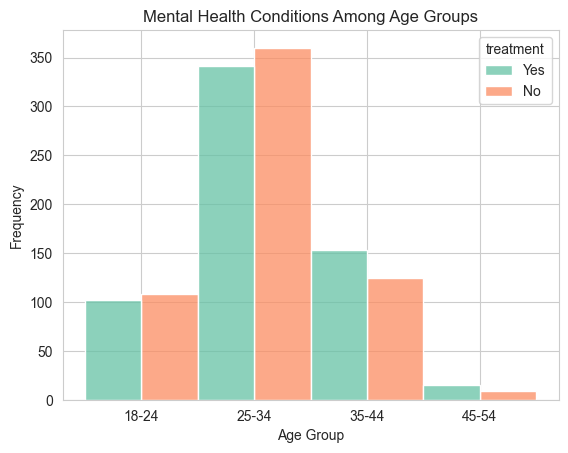

In [10]:
# Visualize the Data
age_bins = [18, 25, 35, 45, 55, 65]
age_labels = ['18-24', '25-34', '35-44', '45-54', '55+']

df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

sns.histplot(data=df, x='AgeGroup', hue='treatment', multiple='dodge', palette='Set2')
plt.title('Mental Health Conditions Among Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.show()

### How does the frequency of mental health issues vary by gender?

* Based on the data, it appears as though Females are much more likely to seek mental health treatment in comparison to Males; those that do not identify as either Male or Female are likely to seek mental health treatment with near 100% certainty, although more datapoints are required to confirm this with greater confidence.

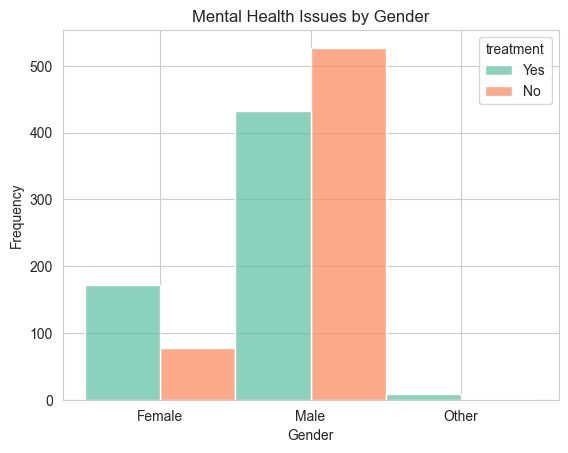

In [11]:
# Visulize the Data
sns.histplot(data=df, x='Gender', hue='treatment', multiple='dodge', palette='Set2')
plt.title('Mental Health Issues by Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

### Identify the countries with the highest and lowest reported rates of mental health issues in the tech industry.

Looking only at countries that had more than 20 responses to the survery:
* Highest Rate - Australia (61.90%)
* Lowest Rate - Netherlands (33.33%)

C:\Users\nivya\AppData\Local\Temp\ipykernel_24332\2163564178.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_rates, x='Country', y='Rate', palette='Set1')


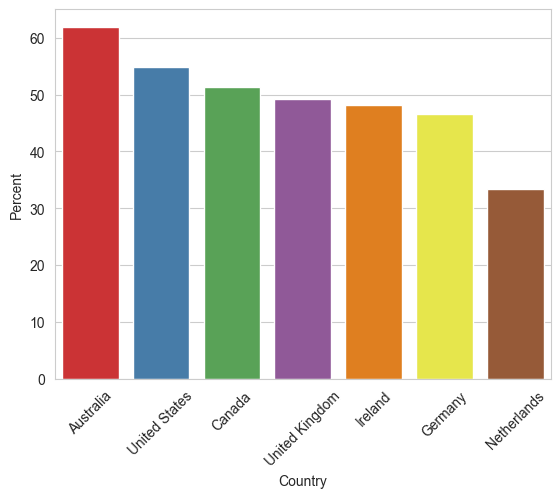

In [12]:
# Filter Out Countries with less than 20 responses
df_filtered = df.groupby('Country').filter(lambda x: len(x) >= 20)

# Convert 'Treatment' Column to numeric values
df_filtered['treatment'] = df_filtered['treatment'].map({'Yes' : 1, 'No' : 0})

# Check Rates per Country
rates = round(df_filtered.groupby('Country')['treatment'].mean()*100, 2).sort_values(ascending=False)

df_rates = rates.reset_index()
df_rates.columns = ['Country', 'Rate']

sns.barplot(data=df_rates, x='Country', y='Rate', palette='Set1')
plt.xticks(rotation=45, fontsize=10) 
plt.xlabel('Country')
plt.ylabel('Percent')
plt.show()